In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
chess_colour=cv2.imread("chess7.jpeg")


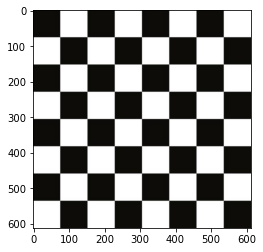

In [3]:
plt.imshow(chess_colour)

In [4]:
chess_gray=cv2.cvtColor(chess_colour, cv2.COLOR_BGR2GRAY)


In [5]:
threshold,chess_binary=cv2.threshold(chess_gray,127,255,cv2.THRESH_BINARY)


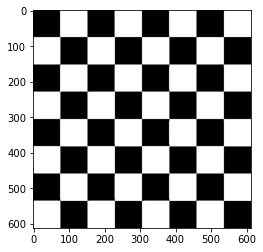

In [6]:
plt.imshow(chess_binary,'gray')

In [7]:
canny = cv2.Canny(chess_binary,100,200)


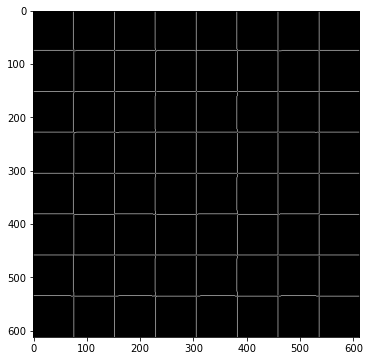

In [8]:
plt.figure(figsize=(6,6)) 
plt.imshow(canny,'gray')

In [9]:
canny.shape

(612, 612)

In [10]:
for i in range(canny.shape[0]):        #checking which positions in rows have edges
    if(canny[i][0]==255):
        print(i)
    

75
152
228
305
381
458
534


In [11]:
for i in range(canny.shape[1]):         #checking which positions in columns have edges
    if(canny[0][i]==255):
        print(i)
    

75
152
228
305
381
458
535


In [12]:
col_pos=[]
for i in range(canny.shape[1]):
    if(canny[0][i]==255):
        col_pos.append(i)
row_pos=[]  
for i in range(canny.shape[0]):
    if(canny[i][0]==255):
        row_pos.append(i)

In [13]:
more_rows=[]
more_cols=[]
for i in row_pos:
    more_rows.append(i)
    if i-1 not in row_pos:
        more_rows.append(i-1)
    if i+1 not in row_pos:
        more_rows.append(i+1)
    if i-2 not in row_pos:
        more_rows.append(i-2)
    if i+2 not in row_pos:
        more_rows.append(i+2)
    if i-3 not in row_pos:
        more_rows.append(i-3)
    if i+3 not in row_pos:
        more_rows.append(i+3)
        
for i in col_pos:
    more_cols.append(i)
    if i-1 not in col_pos:
        more_cols.append(i-1)
    if i+1 not in col_pos:
        more_cols.append(i+1)
    if i-2 not in col_pos:
        more_cols.append(i-2)
    if i+2 not in col_pos:
        more_cols.append(i+2)
    if i-3 not in col_pos:
        more_cols.append(i-3)
    if i+3 not in col_pos:
        more_cols.append(i+3)

In [14]:
for i in more_rows:
    for j in more_cols:
        chess_colour[i][j][0]=255
        chess_colour[i][j][1]=0
        chess_colour[i][j][2]=0

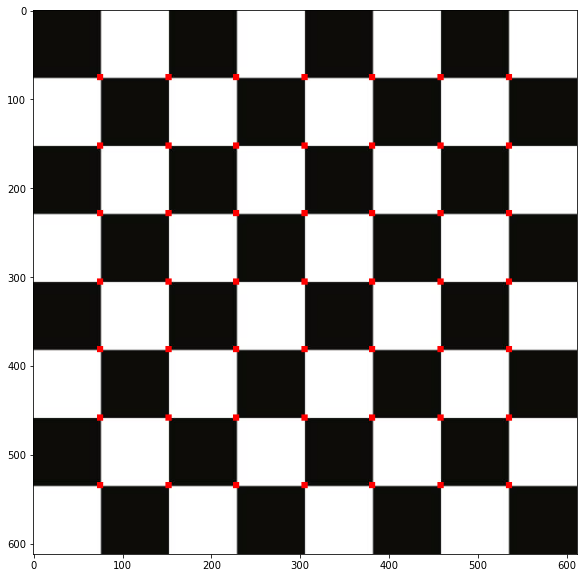

In [15]:
plt.figure(figsize=(10,10)) 
plt.imshow(chess_colour)

In [16]:
edge_rows=[0,1,2,3,4,canny.shape[0]-1,canny.shape[0]-2,canny.shape[0]-3,canny.shape[0]-4,canny.shape[0]-5]
for i in edge_rows:
    for j in more_cols:
        chess_colour[i][j][0]=255
        chess_colour[i][j][1]=0
        chess_colour[i][j][2]=0

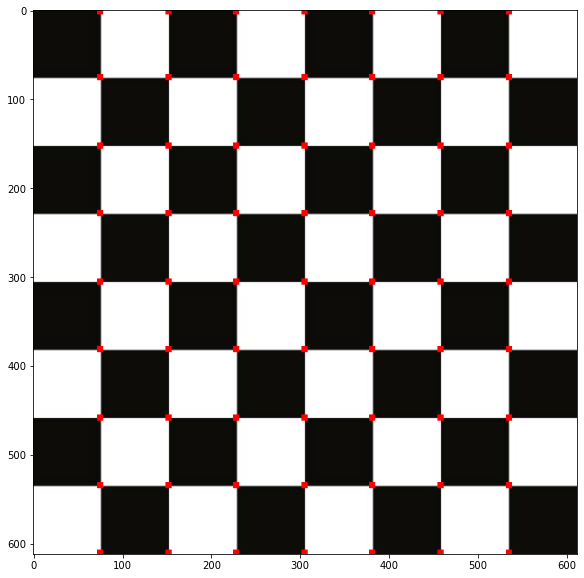

In [17]:
plt.figure(figsize=(10,10)) 
plt.imshow(chess_colour)

In [18]:
edge_cols=[0,1,2,3,4,canny.shape[1]-1,canny.shape[1]-2,canny.shape[1]-3,canny.shape[1]-4,canny.shape[1]-5]
for i in more_rows:
    for j in edge_cols:
        chess_colour[i][j][0]=255
        chess_colour[i][j][1]=0
        chess_colour[i][j][2]=0

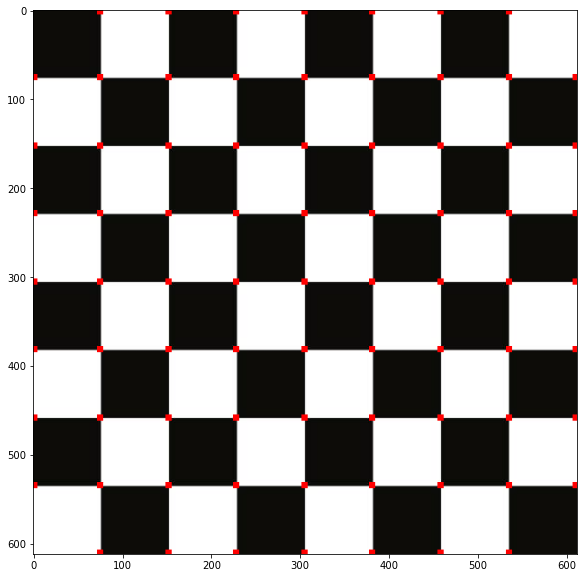

In [19]:
plt.figure(figsize=(10,10)) 
plt.imshow(chess_colour)

In [20]:
for i in edge_rows:
    for j in edge_cols:
        chess_colour[i][j][0]=255
        chess_colour[i][j][1]=0
        chess_colour[i][j][2]=0

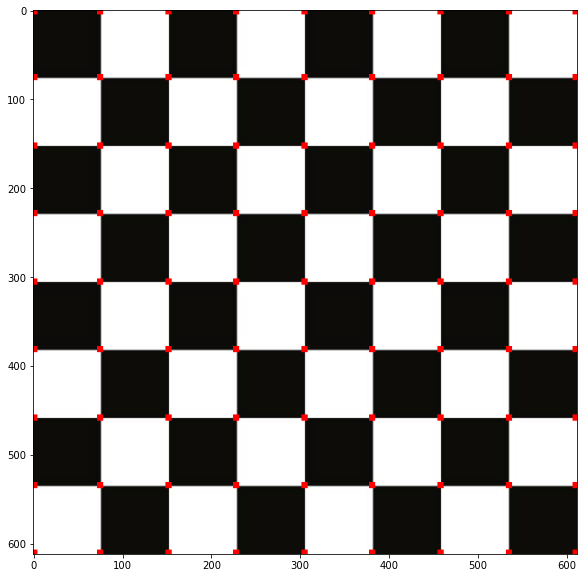

In [21]:
plt.figure(figsize=(10,10)) 
plt.imshow(chess_colour)

In [22]:
cv2.imwrite("edge_marked_chess.jpg",chess_colour)

True

In [23]:
from PIL import Image, ImageDraw, ImageFont
chess = Image.open('edge_marked_chess.jpg')
draw = ImageDraw.Draw(chess)

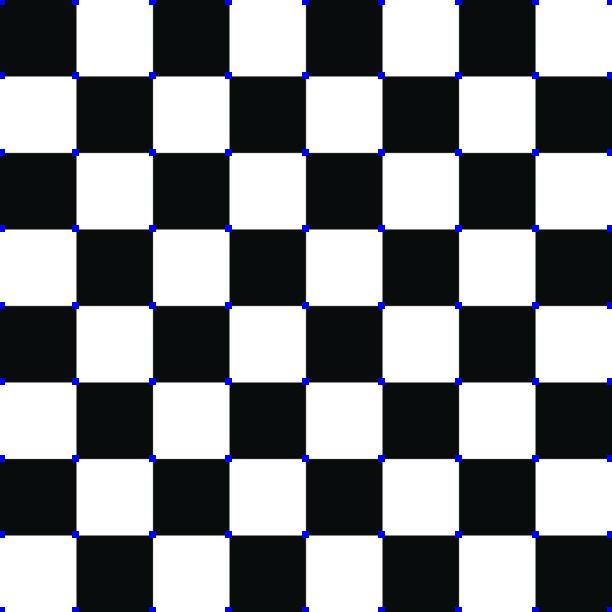

In [24]:
chess

In [25]:
x_cordinates=[2]
for i in row_pos:
    x_cordinates.append(i)
y_cordinates=[2]
for i in col_pos:
    y_cordinates.append(i-1)

    

for y in range(len(y_cordinates)):
    for x in range(len(x_cordinates)):
        coordinate="("+str(y)+","+str(x)+")"
        draw.text((x_cordinates[x], y_cordinates[y]), coordinate, fill=(255,135,0))

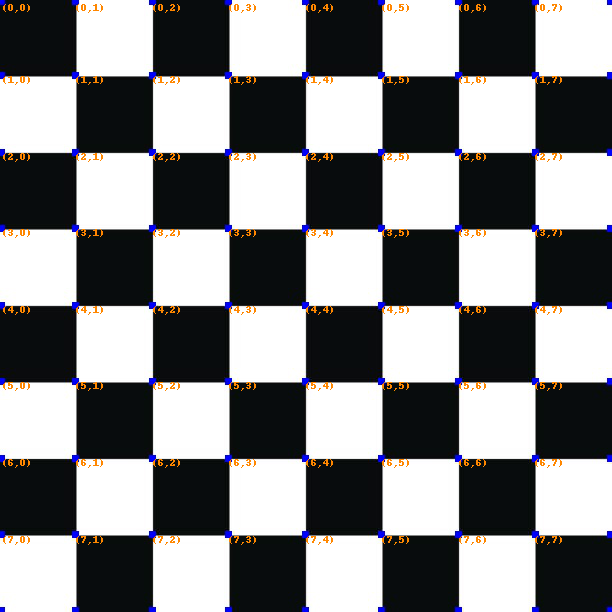

In [26]:
chess

In [27]:
x_cordinates.append(canny.shape[1]-22)

for i in range(len(x_cordinates)):
    coordinate="("+str(8)+","+str(i)+")"
    draw.text((x_cordinates[i],canny.shape[0]-10), coordinate, fill=(255,135,0))

In [31]:
for i in range(len(y_cordinates)):
    coordinate=str(i)+","+str(8)
    draw.text((canny.shape[0]-20,y_cordinates[i]), coordinate, fill=(255,135,0))

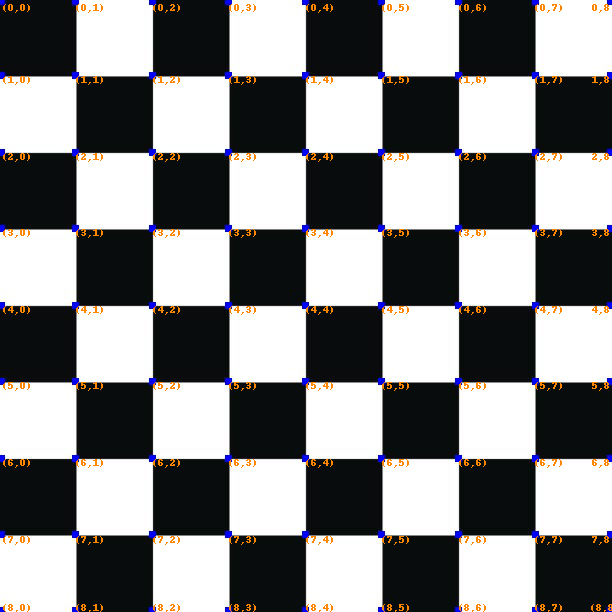

In [32]:
chess